## Generator - Letter Recognition:

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading dataset to dataframe
data = pd.read_csv('letter-recognition.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
#Changing the Alphabet data to numerical starting from 1
data.letter = [ord(x) - 64 for x in data.letter]
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,20,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,9,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,14,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,7,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C45D68A08>,
      dtype=object)

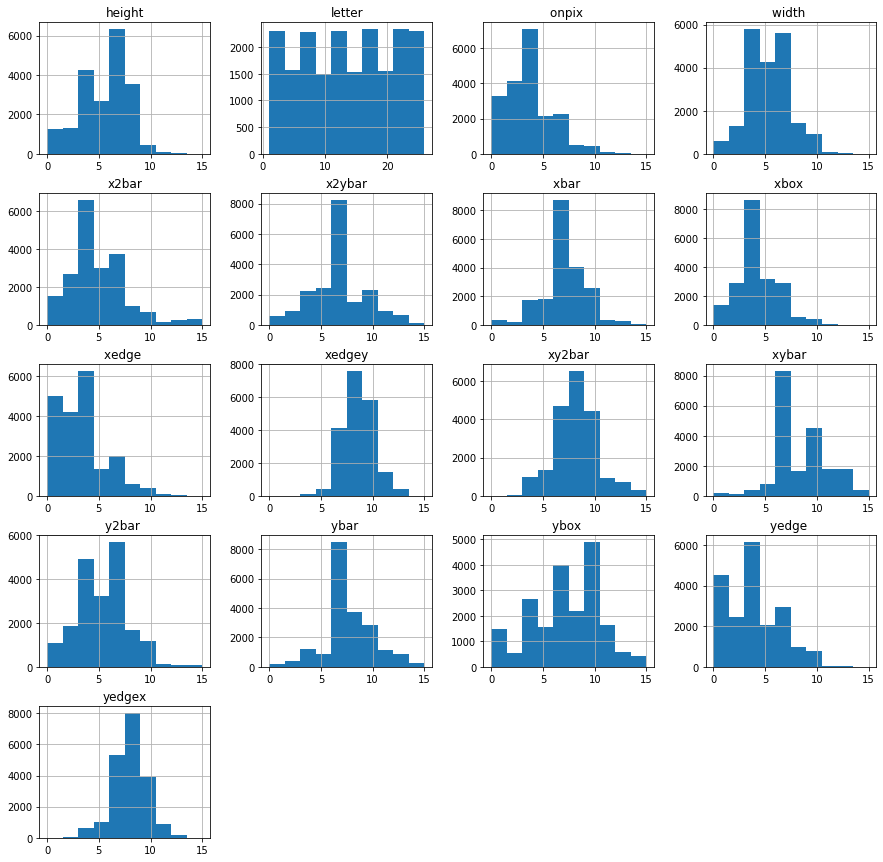

In [4]:
#Distribution bar graphs for each column
data.hist(figsize=(15,15))

In [5]:
#Splitting into input(X) and output(y) values
X = data.drop('letter',axis=1)
y = data['letter']

In [6]:
# Spliting dataset into training (70%) and test (30%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 42)

#### 1. First create a loop that breaks a dataset into blocks and prints them

In [7]:
#Breaking the datset with loops
batch_size = 1000
num_samples = len(X_train)
i = 0

for offset in range(0, num_samples, batch_size):
    print("\nRange", offset, "-" , offset+batch_size)
    # Get the samples you'll use in this batch
    X_batch = X_train[offset:offset+batch_size]
    y_batch = y_train[offset:offset+batch_size]
    i = i+1
    print("Batch", i, ":Dimensions:", X_batch.shape, y_batch.shape)
    print("Input values:\n", X_batch)
    print("Output values:\n", y_batch)
    


Range 0 - 1000
Batch 1 :Dimensions: (1000, 16) (1000,)
Input values:
        xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
17218      6     11       7       9       3      7      7     15       2   
15188      2      7       3       4       2      5     10      8       4   
11295      9     10       9       8       5      5      7      6       9   
19772      5      5       5       7       3      7      8     15       1   
13072      3      5       4       8       2      0     12      4       6   
...      ...    ...     ...     ...     ...    ...    ...    ...     ...   
10432      4      6       6       4       4      8      5      7       5   
6804       8     11       7       6       3      6      9      3       8   
19961      4      5       5       4       4      8      4      4       4   
15705      1      0       1       0       0      2      2      5       4   
3437       3      2       3       3       2      4      4      5       7   

       xybar   x

*The above for loop divided the 14000 dataset into 14 batches with random samples since the batch size used is 1000.*
#### 2. now put your loop into a function, and put a yield statement inside the loop so the function behaves as a generator. Demonstrate it works when you call next() function on it.
**Generator 1: Without Data Augmentation**

In [8]:
#Creating generator to break the dataset into blocks
#Not including Data Augmentation
def myGenerator(features, label, batch_size):
    '''This generator splits the dataset into blocks 
    of specified batch size. Without Data Augmentation'''

    num_samples = len(label)
    features = features.to_numpy()
    label = label.to_numpy()

    while True: # Loop forever so the generator never terminates

        for offset in range(0, num_samples, batch_size):
            print("Range", offset, "-" , offset+batch_size)
            # Gets the samples you'll use in this batch
            X_batch = features[offset:offset+batch_size]
            y_batch = label[offset:offset+batch_size]
            
            # The generator-y part: yield the next training batch            
            yield X_batch, y_batch

In [9]:
#Calling genertor
gen1 = myGenerator(X_train, y_train, 1000)

In [10]:
print(next(gen1)) # yeilds first 1000 samples i.e., 0 - 1000

Range 0 - 1000
(array([[ 6, 11,  7, ...,  8,  0,  8],
       [ 2,  7,  3, ...,  7,  5, 11],
       [ 9, 10,  9, ..., 11,  5,  2],
       ...,
       [ 4,  5,  5, ...,  6,  6,  6],
       [ 1,  0,  1, ...,  8,  0,  8],
       [ 3,  2,  3, ...,  7,  1,  6]], dtype=int64), array([14, 18, 21,  8,  6, 11, 23, 22,  8, 20, 15, 25,  5,  5, 24, 14,  5,
        1,  2,  4,  4, 13,  1, 20, 21, 26, 25, 26, 12, 16, 21,  5, 20, 23,
       16, 14, 13,  7, 14, 20, 13, 20, 13, 21, 26, 24, 18, 20, 16, 22, 23,
        4,  8,  2, 25,  5,  2, 25,  4, 14,  8,  8, 16, 21, 12, 24,  2, 16,
       16, 24, 19,  5, 17,  2, 26,  9,  1,  4,  4, 21,  9,  6,  9, 26,  4,
       23, 23, 22, 16, 15, 17, 24,  7, 21, 16,  7, 23, 20, 14, 22,  7, 17,
       18, 19, 13, 20, 15, 22, 10, 22, 11, 20, 15, 19, 24, 22, 20, 26,  4,
        1,  1, 13,  9, 15, 17, 16, 17, 14, 22, 20,  8,  9, 25, 24, 16,  4,
        2, 25, 21, 14, 17, 13, 19, 26,  3, 21, 11, 22,  1, 13, 23, 22,  2,
        1, 15, 11, 15, 12,  6, 21,  7, 16, 23,  1, 12,

In [11]:
print(next(gen1)) # yeilds next 1000 samples i.e., 1000-2000

Range 1000 - 2000
(array([[ 4,  7,  5, ...,  7,  3,  7],
       [ 3,  9,  4, ...,  9,  0,  8],
       [ 3,  3,  4, ...,  8,  4,  8],
       ...,
       [ 6,  9,  6, ..., 10,  1,  8],
       [ 4,  4,  5, ...,  8,  0,  8],
       [ 5, 10,  7, ...,  8,  5, 10]], dtype=int64), array([14, 21, 24, 19, 21, 12,  9,  5, 20, 25, 26, 13,  5, 26, 16, 22,  2,
       10,  3,  2, 19,  3,  6,  3, 17,  6,  7, 16, 25,  2,  6,  1,  8, 23,
        4, 18, 17, 25, 20, 26, 18, 16, 15,  1, 18,  7,  9, 24, 14,  4,  3,
       14,  9, 13, 14, 23, 21,  7, 11,  4, 23, 16, 21,  5,  4, 23, 13, 16,
       24, 10,  6, 10,  4, 23,  4,  8, 25,  7,  1, 26,  4, 19, 15, 12, 17,
       23,  8, 11, 22,  4,  4, 11, 17, 19, 16,  2, 23, 10,  7,  5, 25, 15,
       20, 25, 12,  4, 22, 23,  3, 10,  6,  8, 23,  6, 19, 25, 24, 14, 25,
       12,  7,  5,  6, 14,  1,  8, 18, 19, 26,  5, 24, 23, 21, 26, 24, 21,
       18,  7, 17, 16, 12, 12,  7, 11,  6, 16, 23,  8, 13, 19,  5, 16,  1,
       16, 17, 20, 20,  3, 10,  8, 11,  1, 22, 14, 

In [12]:
print(next(gen1)) # yeilds next 1000 samples i.e., 2000-3000

Range 2000 - 3000
(array([[ 4,  9,  6, ...,  8,  5,  3],
       [ 4,  3,  4, ...,  8,  4,  8],
       [ 9, 13,  8, ...,  8,  4,  6],
       ...,
       [ 4,  7,  5, ...,  8,  6,  9],
       [ 4,  7,  5, ...,  9,  9,  9],
       [ 5, 10,  6, ...,  6,  6,  5]], dtype=int64), array([ 5, 24, 21, 26, 25, 25, 22, 16, 21, 13, 25, 12,  4, 23, 19, 16, 25,
       24, 17, 20,  6, 23,  7,  4,  7, 10,  9, 24,  4, 25,  6,  4, 20, 16,
       22, 15, 15,  3,  5,  1,  3,  1, 21,  8,  2,  6, 25, 10,  3,  6, 18,
       13, 23,  2, 12, 23, 13, 15, 17, 20, 12, 10,  4, 18, 13,  8, 17,  7,
       15, 18, 13, 22,  8,  7, 17, 19, 26, 12,  6, 10, 26, 18, 12, 24, 14,
        3, 11, 13, 23,  4, 11, 21,  5,  9, 24,  8, 17,  1, 19, 11,  4, 21,
       14, 20,  6, 10, 13,  2,  6, 17, 19, 17, 11, 18,  7, 25,  3,  3,  8,
       25, 26, 23, 10,  2,  4, 19,  8, 11,  1, 20, 13,  2,  1,  9, 17,  6,
       20, 10, 26, 18, 13, 19, 20, 15,  3,  1,  1, 14, 23,  5,  4, 11, 22,
       24, 25,  9,  9,  8, 23, 22, 24,  2, 16, 18, 

*Similay, upon calling the next() function again, it yeilds next 1000 samples i.e., from 2000-3000 and this goes on till the end of the dataset.*
#### 3. now make a different version of your generator which performs some kind of data augmentation for every block. Possibilities include randomly setting values to zero or adding small random numbers to features.

**Generator 2: With Data Augmentation**

In [13]:
#Creating custom generator with data augmentation
def myGenAugmentAdd(features, label, batch_size):
    
    '''This generator adds a random interger value from 0 to 4 to 
    each & every feature value. The label values are not altered.'''

    num_samples = len(label)
    features = features.to_numpy()
    label = label.to_numpy()

    while True: # Loop forever so the generator never terminates

        for offset in range(0, num_samples, batch_size):
            print("Range", offset, "-" , offset+batch_size)
            # Get the samples you'll use in this batch
            X_batch = features[offset:offset+batch_size]
            y_batch = label[offset:offset+batch_size]
            #print(y_batch)
            
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            
            # For each example
            for i in range(offset, offset+batch_size):
                row = []
                for j in range(len(features[0])):
                    #print("ori",features[i] )
                    #print("aug", features[i] + 2)
                    row.append(features[i][j] + random.randint(0, 4))
                X_train.append(row)
                y_train.append(label[i])

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            #print(X_train, y_train)
            print(X_train.shape, y_train.shape)
            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [14]:
#Calling genertor
gen2 = myGenAugmentAdd(X_train, y_train, 1000)

In [15]:
print(next(gen2))# yeilds first 1000 samples i.e., 0 - 1000

Range 0 - 1000
(1000, 16) (1000,)
(array([[ 8, 12,  8, ...,  9,  0,  8],
       [ 6, 10,  3, ..., 10,  6, 14],
       [12, 13, 13, ..., 14,  6,  4],
       ...,
       [ 7,  5,  6, ..., 10,  7,  8],
       [ 1,  2,  3, ...,  9,  3, 10],
       [ 6,  2,  4, ...,  7,  3,  6]], dtype=int64), array([14, 18, 21,  8,  6, 11, 23, 22,  8, 20, 15, 25,  5,  5, 24, 14,  5,
        1,  2,  4,  4, 13,  1, 20, 21, 26, 25, 26, 12, 16, 21,  5, 20, 23,
       16, 14, 13,  7, 14, 20, 13, 20, 13, 21, 26, 24, 18, 20, 16, 22, 23,
        4,  8,  2, 25,  5,  2, 25,  4, 14,  8,  8, 16, 21, 12, 24,  2, 16,
       16, 24, 19,  5, 17,  2, 26,  9,  1,  4,  4, 21,  9,  6,  9, 26,  4,
       23, 23, 22, 16, 15, 17, 24,  7, 21, 16,  7, 23, 20, 14, 22,  7, 17,
       18, 19, 13, 20, 15, 22, 10, 22, 11, 20, 15, 19, 24, 22, 20, 26,  4,
        1,  1, 13,  9, 15, 17, 16, 17, 14, 22, 20,  8,  9, 25, 24, 16,  4,
        2, 25, 21, 14, 17, 13, 19, 26,  3, 21, 11, 22,  1, 13, 23, 22,  2,
        1, 15, 11, 15, 12,  6, 21, 

In [16]:
print(next(gen2))# yeilds next 1000 samples i.e., 1000-2000

Range 1000 - 2000
(1000, 16) (1000,)
(array([[ 4, 11,  8, ..., 10,  7, 11],
       [ 7, 13,  5, ..., 12,  0,  9],
       [ 7,  4,  5, ..., 12,  6,  9],
       ...,
       [ 7, 13, 10, ..., 11,  2,  9],
       [ 4,  5,  8, ...,  8,  2, 12],
       [ 6, 11,  7, ..., 11,  9, 11]], dtype=int64), array([14, 21, 24, 19, 21, 12,  9,  5, 20, 25, 26, 13,  5, 26, 16, 22,  2,
       10,  3,  2, 19,  3,  6,  3, 17,  6,  7, 16, 25,  2,  6,  1,  8, 23,
        4, 18, 17, 25, 20, 26, 18, 16, 15,  1, 18,  7,  9, 24, 14,  4,  3,
       14,  9, 13, 14, 23, 21,  7, 11,  4, 23, 16, 21,  5,  4, 23, 13, 16,
       24, 10,  6, 10,  4, 23,  4,  8, 25,  7,  1, 26,  4, 19, 15, 12, 17,
       23,  8, 11, 22,  4,  4, 11, 17, 19, 16,  2, 23, 10,  7,  5, 25, 15,
       20, 25, 12,  4, 22, 23,  3, 10,  6,  8, 23,  6, 19, 25, 24, 14, 25,
       12,  7,  5,  6, 14,  1,  8, 18, 19, 26,  5, 24, 23, 21, 26, 24, 21,
       18,  7, 17, 16, 12, 12,  7, 11,  6, 16, 23,  8, 13, 19,  5, 16,  1,
       16, 17, 20, 20,  3, 10,  

In [17]:
print(next(gen2))# yeilds next 1000 samples i.e., 2000-3000

Range 2000 - 3000
(1000, 16) (1000,)
(array([[ 7, 11,  9, ..., 10,  5,  4],
       [ 6,  5,  8, ...,  9,  7, 11],
       [13, 17,  8, ...,  9,  6,  8],
       ...,
       [ 6, 11,  6, ..., 10, 10, 12],
       [ 6,  9,  6, ...,  9, 10, 13],
       [ 9, 12,  8, ...,  6,  6,  9]], dtype=int64), array([ 5, 24, 21, 26, 25, 25, 22, 16, 21, 13, 25, 12,  4, 23, 19, 16, 25,
       24, 17, 20,  6, 23,  7,  4,  7, 10,  9, 24,  4, 25,  6,  4, 20, 16,
       22, 15, 15,  3,  5,  1,  3,  1, 21,  8,  2,  6, 25, 10,  3,  6, 18,
       13, 23,  2, 12, 23, 13, 15, 17, 20, 12, 10,  4, 18, 13,  8, 17,  7,
       15, 18, 13, 22,  8,  7, 17, 19, 26, 12,  6, 10, 26, 18, 12, 24, 14,
        3, 11, 13, 23,  4, 11, 21,  5,  9, 24,  8, 17,  1, 19, 11,  4, 21,
       14, 20,  6, 10, 13,  2,  6, 17, 19, 17, 11, 18,  7, 25,  3,  3,  8,
       25, 26, 23, 10,  2,  4, 19,  8, 11,  1, 20, 13,  2,  1,  9, 17,  6,
       20, 10, 26, 18, 13, 19, 20, 15,  3,  1,  1, 14, 23,  5,  4, 11, 22,
       24, 25,  9,  9,  8, 23, 2

**Generator 3: With Data Augmentation**

In [18]:
#Creating custom generator with data augmentation

def myGenAugment0(features, label, batch_size):
    
    '''This generator replaces the feature value that is
    greater than 12 with 0. The label values are not altered.'''

    num_samples = len(label)
    features = features.to_numpy()
    label = label.to_numpy()

    while True: # Loop forever so the generator never terminates

        for offset in range(0, num_samples, batch_size):
            print("Range", offset, "-" , offset+batch_size)
            # Get the samples you'll use in this batch
            X_batch = features[offset:offset+batch_size]
            y_batch = label[offset:offset+batch_size]
            #print(y_batch)
            
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            
            # For each example
            for i in range(offset, offset+batch_size):
                X_train.append(np.where(features[i] >12, 0, features[i]))
                y_train.append(label[i])

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            #print(X_train, y_train)
            print(X_train.shape, y_train.shape)
            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [19]:
#Calling genertor
gen3 = myGenAugment0(X_train, y_train, 1000)

In [20]:
print(next(gen3))# yeilds first 1000 samples i.e., 0-1000

Range 0 - 1000
(1000, 16) (1000,)
(array([[ 6, 11,  7, ...,  8,  0,  8],
       [ 2,  7,  3, ...,  7,  5, 11],
       [ 9, 10,  9, ..., 11,  5,  2],
       ...,
       [ 4,  5,  5, ...,  6,  6,  6],
       [ 1,  0,  1, ...,  8,  0,  8],
       [ 3,  2,  3, ...,  7,  1,  6]], dtype=int64), array([14, 18, 21,  8,  6, 11, 23, 22,  8, 20, 15, 25,  5,  5, 24, 14,  5,
        1,  2,  4,  4, 13,  1, 20, 21, 26, 25, 26, 12, 16, 21,  5, 20, 23,
       16, 14, 13,  7, 14, 20, 13, 20, 13, 21, 26, 24, 18, 20, 16, 22, 23,
        4,  8,  2, 25,  5,  2, 25,  4, 14,  8,  8, 16, 21, 12, 24,  2, 16,
       16, 24, 19,  5, 17,  2, 26,  9,  1,  4,  4, 21,  9,  6,  9, 26,  4,
       23, 23, 22, 16, 15, 17, 24,  7, 21, 16,  7, 23, 20, 14, 22,  7, 17,
       18, 19, 13, 20, 15, 22, 10, 22, 11, 20, 15, 19, 24, 22, 20, 26,  4,
        1,  1, 13,  9, 15, 17, 16, 17, 14, 22, 20,  8,  9, 25, 24, 16,  4,
        2, 25, 21, 14, 17, 13, 19, 26,  3, 21, 11, 22,  1, 13, 23, 22,  2,
        1, 15, 11, 15, 12,  6, 21, 

In [21]:
print(next(gen3))# yeilds next 1000 samples i.e., 1000-2000

Range 1000 - 2000
(1000, 16) (1000,)
(array([[ 4,  7,  5, ...,  7,  3,  7],
       [ 3,  9,  4, ...,  9,  0,  8],
       [ 3,  3,  4, ...,  8,  4,  8],
       ...,
       [ 6,  9,  6, ..., 10,  1,  8],
       [ 4,  4,  5, ...,  8,  0,  8],
       [ 5, 10,  7, ...,  8,  5, 10]], dtype=int64), array([14, 21, 24, 19, 21, 12,  9,  5, 20, 25, 26, 13,  5, 26, 16, 22,  2,
       10,  3,  2, 19,  3,  6,  3, 17,  6,  7, 16, 25,  2,  6,  1,  8, 23,
        4, 18, 17, 25, 20, 26, 18, 16, 15,  1, 18,  7,  9, 24, 14,  4,  3,
       14,  9, 13, 14, 23, 21,  7, 11,  4, 23, 16, 21,  5,  4, 23, 13, 16,
       24, 10,  6, 10,  4, 23,  4,  8, 25,  7,  1, 26,  4, 19, 15, 12, 17,
       23,  8, 11, 22,  4,  4, 11, 17, 19, 16,  2, 23, 10,  7,  5, 25, 15,
       20, 25, 12,  4, 22, 23,  3, 10,  6,  8, 23,  6, 19, 25, 24, 14, 25,
       12,  7,  5,  6, 14,  1,  8, 18, 19, 26,  5, 24, 23, 21, 26, 24, 21,
       18,  7, 17, 16, 12, 12,  7, 11,  6, 16, 23,  8, 13, 19,  5, 16,  1,
       16, 17, 20, 20,  3, 10,  

In [22]:
print(next(gen3))# yeilds next 1000 samples i.e., 2000-3000

Range 2000 - 3000
(1000, 16) (1000,)
(array([[ 4,  9,  6, ...,  8,  5,  3],
       [ 4,  3,  4, ...,  8,  4,  8],
       [ 9,  0,  8, ...,  8,  4,  6],
       ...,
       [ 4,  7,  5, ...,  8,  6,  9],
       [ 4,  7,  5, ...,  9,  9,  9],
       [ 5, 10,  6, ...,  6,  6,  5]], dtype=int64), array([ 5, 24, 21, 26, 25, 25, 22, 16, 21, 13, 25, 12,  4, 23, 19, 16, 25,
       24, 17, 20,  6, 23,  7,  4,  7, 10,  9, 24,  4, 25,  6,  4, 20, 16,
       22, 15, 15,  3,  5,  1,  3,  1, 21,  8,  2,  6, 25, 10,  3,  6, 18,
       13, 23,  2, 12, 23, 13, 15, 17, 20, 12, 10,  4, 18, 13,  8, 17,  7,
       15, 18, 13, 22,  8,  7, 17, 19, 26, 12,  6, 10, 26, 18, 12, 24, 14,
        3, 11, 13, 23,  4, 11, 21,  5,  9, 24,  8, 17,  1, 19, 11,  4, 21,
       14, 20,  6, 10, 13,  2,  6, 17, 19, 17, 11, 18,  7, 25,  3,  3,  8,
       25, 26, 23, 10,  2,  4, 19,  8, 11,  1, 20, 13,  2,  1,  9, 17,  6,
       20, 10, 26, 18, 13, 19, 20, 15,  3,  1,  1, 14, 23,  5,  4, 11, 22,
       24, 25,  9,  9,  8, 23, 2